In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**Bobo's data:**

In [2]:
path_to_files = '/Users/npolizzi/Projects/apixaban_experiments/bobo/'
ableL = pd.read_csv(path_to_files + 'ableD_305.csv')

Text(0.5, 1.0, 'ABLE and apixaban')

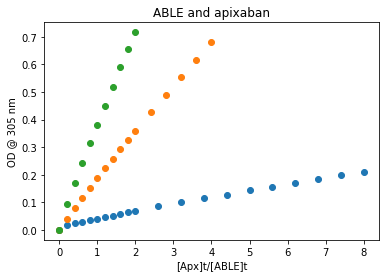

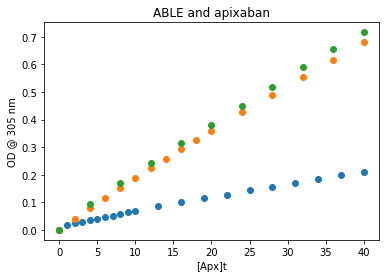

In [3]:
plt.figure(); plt.plot(ableL['apxABLE_ratio_5uM'], ableL['OD305_5uM'], 'o')
plt.plot(ableL['apxABLE_ratio_10uM'], ableL['OD305_10uM'], 'o')
plt.plot(ableL['apxABLE_ratio_20uM'], ableL['OD305_20uM'], 'o')
plt.xlabel('[Apx]t/[ABLE]t')
plt.ylabel('OD @ 305 nm')
plt.title('ABLE and apixaban')

plt.figure(); plt.plot(5*ableL['apxABLE_ratio_5uM'], ableL['OD305_5uM'], 'o')
plt.plot(10*ableL['apxABLE_ratio_10uM'], ableL['OD305_10uM'], 'o')
plt.plot(20*ableL['apxABLE_ratio_20uM'], ableL['OD305_20uM'], 'o')
plt.xlabel('[Apx]t')
plt.ylabel('OD @ 305 nm')
plt.title('ABLE and apixaban')

In [4]:
data_5uM = ableL[['apxABLE_ratio_5uM','OD305_5uM']].dropna()
data_10uM = ableL[['apxABLE_ratio_10uM','OD305_10uM']].dropna()
data_20uM = ableL[['apxABLE_ratio_20uM','OD305_20uM']].dropna()

In [5]:
def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))

In [6]:
def res_floatapx_bobo(x):
    rs = []
    rs.extend( [data_5uM['OD305_5uM'].values[i] - data_5uM['OD305_5uM'].values[0] - x[3] * 5*data_5uM['apxABLE_ratio_5uM'].values[i] - x[0] * pl_stoich(5, 5*data_5uM['apxABLE_ratio_5uM'].values[i], x[1], x[2]) for i in range(len(data_5uM['apxABLE_ratio_5uM']))])
    rs.extend( [data_10uM['OD305_10uM'].values[i] - data_10uM['OD305_10uM'].values[0] - x[4] * 10*data_10uM['apxABLE_ratio_10uM'].values[i] - x[0] * pl_stoich(10, 10*data_10uM['apxABLE_ratio_10uM'].values[i], x[1], x[2]) for i in range(len(data_10uM['apxABLE_ratio_10uM']))])
    rs.extend( [data_20uM['OD305_20uM'].values[i] - data_20uM['OD305_20uM'].values[0] - x[5] * 20*data_20uM['apxABLE_ratio_20uM'].values[i] - x[0] * pl_stoich(20, 20*data_20uM['apxABLE_ratio_20uM'].values[i], x[1], x[2]) for i in range(len(data_20uM['apxABLE_ratio_20uM']))])
    return np.array(rs)


In [7]:
def res_floatapx_bobo_no5(x):
    rs = []
    rs.extend( [data_10uM['OD305_10uM'].values[i] - data_10uM['OD305_10uM'].values[0] - x[3] * 10*data_10uM['apxABLE_ratio_10uM'].values[i] - x[0] * pl_stoich(10, 10*data_10uM['apxABLE_ratio_10uM'].values[i], x[1], x[2]) for i in range(len(data_10uM['apxABLE_ratio_10uM']))])
    rs.extend( [data_20uM['OD305_20uM'].values[i] - data_20uM['OD305_20uM'].values[0] - x[4] * 20*data_20uM['apxABLE_ratio_20uM'].values[i] - x[0] * pl_stoich(20, 20*data_20uM['apxABLE_ratio_20uM'].values[i], x[1], x[2]) for i in range(len(data_20uM['apxABLE_ratio_20uM']))])
    return np.array(rs)

In [8]:
from scipy.optimize import least_squares, curve_fit

res_305_floatapx = least_squares(res_floatapx_bobo, np.array([.004, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.3, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])

x_bobo = res_305_floatapx.x
print('Fit of full data from Bobo:')
print('delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_bobo[0],
      'Kd (uM)=', x_bobo[1],
      'N(stoichiometry)=', x_bobo[2],
      'Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_bobo[3],
      'Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_bobo[4],
      'Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_bobo[5],
      )

res_305_floatapx_no5 = least_squares(res_floatapx_bobo_no5, np.array([.004, 1, 1, .007,.007]), bounds=[(0.0001,.1,.3, .0001,.0001), (.02,50,3, .1,.1)])

x_bobo_no5 = res_305_floatapx_no5.x
print('Fit of 10uM and 20uM data from Bobo:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_bobo_no5[0],
      'Kd (uM)=', x_bobo_no5[1],
      'N(stoichiometry)=', x_bobo_no5[2],
      'Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_bobo_no5[3],
      'Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_bobo_no5[4],
      )

Fit of full data from Bobo:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 0.006425521785627206 Kd (uM)= 2.122359220101231 N(stoichiometry)= 1.4242368683339852 Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.004854541864418058 Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.0159775485143301 Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)= 0.01579931343743138
Fit of 10uM and 20uM data from Bobo:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 0.015408064648541988 Kd (uM)= 7.097513014127491 N(stoichiometry)= 2.9987680155877485 Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.016036128403072964 Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)= 0.015800967202000527


In [9]:
fit_abs5 = [data_5uM['OD305_5uM'].values[0] + x_bobo[3] * np.linspace(0,60,100)[i] + x_bobo[0] * pl_stoich(5, np.linspace(0,60,100)[i], x_bobo[1], x_bobo[2]) for i in range(len(np.linspace(0,60,100)))]

plt.figure(); plt.plot(5*data_5uM['apxABLE_ratio_5uM'], data_5uM['OD305_5uM'], 'o')
plt.plot(np.linspace(0,60,100), fit_abs5)

def y(x,m, b):
    return m*x + b

ys = data_5uM['OD305_5uM'].values[:3]
xs = 5*data_5uM['apxABLE_ratio_5uM'].values[:3]
popt, pcov = curve_fit(y,xs,ys)
data_fit = [y(i, *popt) for i in np.linspace(0,60,100)]
plt.plot(np.linspace(0,60,100), data_fit, color='k')
plt.xlim([-1, 41])
plt.ylim([-.02, .9])
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Absorbance (OD)')
plt.title('Absorbance @ 305 nm of ABLE and apixaban (5 uM), bobo')

Text(0.5, 1.0, 'Absorbance @ 305 nm of ABLE and apixaban (5 uM), bobo')

In [10]:
fit_abs10 = [data_10uM['OD305_10uM'].values[0] + x_bobo[4] * np.linspace(0,60,100)[i] + x_bobo[0] * pl_stoich(10, np.linspace(0,60,100)[i], x_bobo[1], x_bobo[2]) for i in range(len(np.linspace(0,60,100)))]

plt.figure(); plt.plot(10*data_10uM['apxABLE_ratio_10uM'], data_10uM['OD305_10uM'], 'o')
plt.plot(np.linspace(0,60,100), fit_abs10)

def y(x,m, b):
    return m*x + b

ys = data_10uM['OD305_10uM'].values[:3]
xs = 10*data_10uM['apxABLE_ratio_10uM'].values[:3]
popt, pcov = curve_fit(y,xs,ys)
data_fit = [y(i, *popt) for i in np.linspace(0,60,100)]
plt.plot(np.linspace(0,60,100), data_fit, color='k')
plt.xlim([-1, 41])
plt.ylim([-.02, .9])
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Absorbance (OD)')
plt.title('Absorbance @ 305 nm of ABLE and apixaban (10 uM), bobo')

Text(0.5, 1.0, 'Absorbance @ 305 nm of ABLE and apixaban (10 uM), bobo')

In [11]:
fit_abs20 = [data_20uM['OD305_20uM'].values[0] + x_bobo[5] * np.linspace(0,60,100)[i] + x_bobo[0] * pl_stoich(20, np.linspace(0,60,100)[i], x_bobo[1], x_bobo[2]) for i in range(len(np.linspace(0,60,100)))]

plt.figure(); plt.plot(20*data_20uM['apxABLE_ratio_20uM'], data_20uM['OD305_20uM'], 'o')
plt.plot(np.linspace(0,60,100), fit_abs20)

def y(x,m, b):
    return m*x + b

ys = data_20uM['OD305_20uM'].values[:3]
xs = 20*data_20uM['apxABLE_ratio_20uM'].values[:3]
popt, pcov = curve_fit(y,xs,ys)
data_fit = [y(i, *popt) for i in np.linspace(0,60,100)]
plt.plot(np.linspace(0,60,100), data_fit, color='k')
plt.xlim([-1, 41])
plt.ylim([-.02, .9])
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Absorbance (OD)')
plt.title('Absorbance @ 305 nm of ABLE and apixaban (20 uM), bobo')

Text(0.5, 1.0, 'Absorbance @ 305 nm of ABLE and apixaban (20 uM), bobo')

In [12]:
dePL_5 = [data_5uM['OD305_5uM'].values[i] - data_5uM['OD305_5uM'].values[0] - x_bobo[3] * 5*data_5uM['apxABLE_ratio_5uM'].values[i] for i in range(len(data_5uM['apxABLE_ratio_5uM']))]
dePL_10 = [data_10uM['OD305_10uM'].values[i] - data_10uM['OD305_10uM'].values[0] - x_bobo[4] * 10*data_10uM['apxABLE_ratio_10uM'].values[i] for i in range(len(data_10uM['apxABLE_ratio_10uM']))]
dePL_20 = [data_20uM['OD305_20uM'].values[i] - data_20uM['OD305_20uM'].values[0] - x_bobo[5] * 20*data_20uM['apxABLE_ratio_20uM'].values[i] for i in range(len(data_20uM['apxABLE_ratio_20uM']))]
plt.figure()
plt.plot(20*data_20uM['apxABLE_ratio_20uM'].values, dePL_20, 'o')
plt.plot(10*data_10uM['apxABLE_ratio_10uM'].values, dePL_10, 'o')
plt.plot(5*data_5uM['apxABLE_ratio_5uM'].values, dePL_5, 'o')
fit_dePL_5 = [x_bobo[0] * pl_stoich(5, 5*data_5uM['apxABLE_ratio_5uM'].values[i], x_bobo[1], x_bobo[2]) for i in range(len(data_5uM['apxABLE_ratio_5uM']))]
fit_dePL_10 = [x_bobo[0] * pl_stoich(10, 10*data_10uM['apxABLE_ratio_10uM'].values[i], x_bobo[1], x_bobo[2]) for i in range(len(data_10uM['apxABLE_ratio_10uM']))]
fit_dePL_20 = [x_bobo[0] * pl_stoich(20, 20*data_20uM['apxABLE_ratio_20uM'].values[i], x_bobo[1], x_bobo[2]) for i in range(len(data_20uM['apxABLE_ratio_20uM']))]
plt.plot(5*data_5uM['apxABLE_ratio_5uM'].values, fit_dePL_5)
plt.plot(10*data_10uM['apxABLE_ratio_10uM'].values, fit_dePL_10)
plt.plot(20*data_20uM['apxABLE_ratio_20uM'].values, fit_dePL_20)
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [ABLE Apx] of ABLE and apixaban, bobo')

Text(0.5, 1.0, 'dEps * [ABLE Apx] of ABLE and apixaban, bobo')

In [13]:
dePL_5 = [data_5uM['OD305_5uM'].values[i] - data_5uM['OD305_5uM'].values[0] - x_bobo[3] * 5*data_5uM['apxABLE_ratio_5uM'].values[i] for i in range(len(data_5uM['apxABLE_ratio_5uM']))]
dePL_10 = [data_10uM['OD305_10uM'].values[i] - data_10uM['OD305_10uM'].values[0] - x_bobo[4] * 10*data_10uM['apxABLE_ratio_10uM'].values[i] for i in range(len(data_10uM['apxABLE_ratio_10uM']))]
dePL_20 = [data_20uM['OD305_20uM'].values[i] - data_20uM['OD305_20uM'].values[0] - x_bobo[5] * 20*data_20uM['apxABLE_ratio_20uM'].values[i] for i in range(len(data_20uM['apxABLE_ratio_20uM']))]
plt.figure()
plt.plot(data_20uM['apxABLE_ratio_20uM'].values, dePL_20, 'o')
plt.plot(data_10uM['apxABLE_ratio_10uM'].values, dePL_10, 'o')
plt.plot(data_5uM['apxABLE_ratio_5uM'].values, dePL_5, 'o')
fit_dePL_5 = [x_bobo[0] * pl_stoich(5, 5*data_5uM['apxABLE_ratio_5uM'].values[i], x_bobo[1], x_bobo[2]) for i in range(len(data_5uM['apxABLE_ratio_5uM']))]
fit_dePL_10 = [x_bobo[0] * pl_stoich(10, 10*data_10uM['apxABLE_ratio_10uM'].values[i], x_bobo[1], x_bobo[2]) for i in range(len(data_10uM['apxABLE_ratio_10uM']))]
fit_dePL_20 = [x_bobo[0] * pl_stoich(20, 20*data_20uM['apxABLE_ratio_20uM'].values[i], x_bobo[1], x_bobo[2]) for i in range(len(data_20uM['apxABLE_ratio_20uM']))]
plt.plot(data_5uM['apxABLE_ratio_5uM'].values, fit_dePL_5)
plt.plot(data_10uM['apxABLE_ratio_10uM'].values, fit_dePL_10)
plt.plot(data_20uM['apxABLE_ratio_20uM'].values, fit_dePL_20)
plt.xlabel('[Apx]T/[ABLE]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [ABLE Apx] of ABLE and apixaban, bobo')

Text(0.5, 1.0, 'dEps * [ABLE Apx] of ABLE and apixaban, bobo')

In [14]:
dePL_10 = [data_10uM['OD305_10uM'].values[i] - data_10uM['OD305_10uM'].values[0] - x_bobo_no5[3] * 10*data_10uM['apxABLE_ratio_10uM'].values[i] for i in range(len(data_10uM['apxABLE_ratio_10uM']))]
dePL_20 = [data_20uM['OD305_20uM'].values[i] - data_20uM['OD305_20uM'].values[0] - x_bobo_no5[4] * 20*data_20uM['apxABLE_ratio_20uM'].values[i] for i in range(len(data_20uM['apxABLE_ratio_20uM']))]
plt.figure()
plt.plot(10*data_10uM['apxABLE_ratio_10uM'].values, dePL_10, 'o')
plt.plot(20*data_20uM['apxABLE_ratio_20uM'].values, dePL_20, 'o')
fit_dePL_10 = [x_bobo_no5[0] * pl_stoich(10, 10*data_10uM['apxABLE_ratio_10uM'].values[i], x_bobo_no5[1], x_bobo_no5[2]) for i in range(len(data_10uM['apxABLE_ratio_10uM']))]
fit_dePL_20 = [x_bobo_no5[0] * pl_stoich(20, 20*data_20uM['apxABLE_ratio_20uM'].values[i], x_bobo_no5[1], x_bobo_no5[2]) for i in range(len(data_20uM['apxABLE_ratio_20uM']))]
plt.plot(10*data_10uM['apxABLE_ratio_10uM'].values, fit_dePL_10)
plt.plot(20*data_20uM['apxABLE_ratio_20uM'].values, fit_dePL_20)
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [ABLE Apx] of ABLE and apixaban, bobo, no 5uM')

Text(0.5, 1.0, 'dEps * [ABLE Apx] of ABLE and apixaban, bobo, no 5uM')

**My data from Science paper:**

Read the data into a python session.

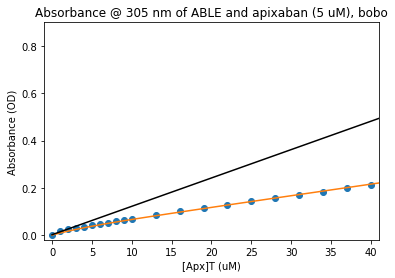

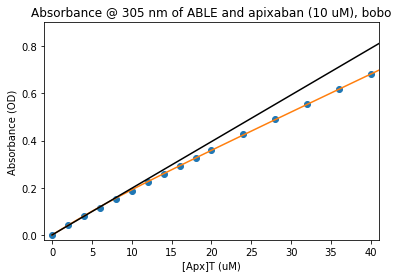

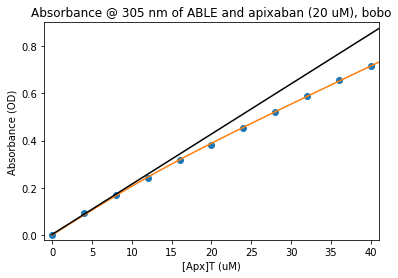

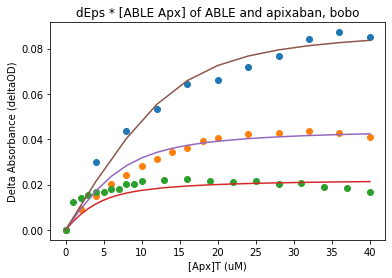

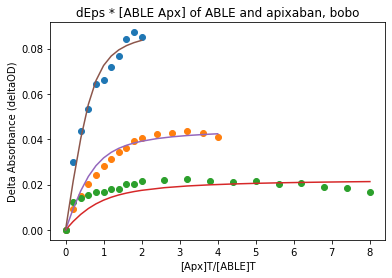

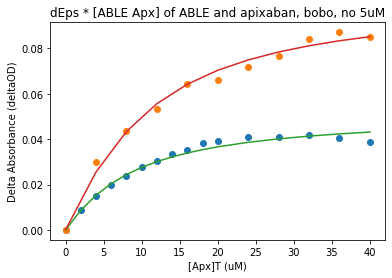

In [15]:
from scipy.optimize import least_squares, curve_fit

path_to_data = '/Users/npolizzi/Projects/apixaban_experiments/hp/20200218/'

def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))

with open(path_to_data + 'HISTAGABLE_5UM_20200219_2ML_4ULOF2MMAPXSTOCK.txt', 'r') as infile:
    infile.readline()
    infile.readline()
    concs_histagable2ml5 = []
    abs305_histagable2ml5 = []
    for i, line in enumerate(infile):
        abs305_histagable2ml5.append(float(line.split()[-3]))

with open(path_to_data + 'HISTAGABLE_10UM_20200219_2ML_4ULOF2MMAPXSTOCK.txt', 'r') as infile:
    infile.readline()
    infile.readline()
    concs_histagable2ml10 = []
    abs305_histagable2ml10 = []
    for i, line in enumerate(infile):
        concs_histagable2ml10.append(i * 4)
        abs305_histagable2ml10.append(float(line.split()[-3]))

with open('/Users/npolizzi/Projects/apixaban_experiments/hp/20200218/HISTAGABLE_20UM_20200219_2ML_4ULOF2MMAPXSTOCK.txt', 'r') as infile:
    infile.readline()
    infile.readline()
    concs_histagable2ml20 = []
    abs305_histagable2ml20 = []
    for i, line in enumerate(infile):
        concs_histagable2ml20.append(i * 4)
        abs305_histagable2ml20.append(float(line.split()[-3]))

Make adjusted concentrations (to account for small changes in volume of the sample when adding concentrated Apx from DMSO stock)

In [16]:
concs_histagablenew5 = [0,1,2,3,4,5,6,7,8,9,10,11,12,16,20,24,28,32,36,40]
concs_histagablenew5_ = []
i = 0
k = 0
for c in concs_histagablenew5:
    m = ((c - i)/2)
    concs_histagablenew5_.append(c * 1000/(1000 + k + m))
    i = c
    k += m
concs_histagable2ml5_ = concs_histagablenew5_

concs_histagablenew10 = [0,2,4,6,8,10,12,14,16,18,20,24,28,32,36,40]
concs_histagablenew10_ = []
i = 0
k = 0
for c in concs_histagablenew10:
    m = ((c - i)/2)
    concs_histagablenew10_.append(c * 1000/(1000 + k + m))
    i = c
    k += m
concs_histagable2ml10_ = concs_histagablenew10_

concs_apx2n = [0,4,8,12,16,20,24,28,32,36,40]
concs_apx2n_ = []
i = 0
k = 0
for c in concs_apx2n:
    m = ((c - i)/2)
    concs_apx2n_.append(c * 1000/(1000 + k + m))
    i = c
    k += m
concs_histagable2ml20_ = concs_apx2n_

Define the function for the residuals to be minimized.

In [17]:
def res_floatapx(x):
    rs = []
    rs.extend( [abs305_histagable2ml5[i] - abs305_histagable2ml5[0] - x[3] * concs_histagable2ml5_[i] - x[0] * pl_stoich(5, concs_histagable2ml5_[i], x[1], x[2]) for i in range(len(concs_histagable2ml5_))])
    rs.extend( [abs305_histagable2ml10[i] - abs305_histagable2ml10[0] - x[4] * concs_histagable2ml10_[i] - x[0] * pl_stoich(10, concs_histagable2ml10_[i], x[1], x[2]) for i in range(len(concs_histagable2ml10_))])
    rs.extend( [abs305_histagable2ml20[i] - abs305_histagable2ml20[0] - x[5] * concs_histagable2ml20_[i] - x[0] * pl_stoich(20, concs_histagable2ml20_[i], x[1], x[2]) for i in range(len(concs_histagable2ml20_))])
    return np.array(rs)

Fit the data.

In [18]:
res_305_floatapx = least_squares(res_floatapx, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])

x = res_305_floatapx.x  # fit parameters
x_orig = x

print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_orig[0],
      'Kd (uM)=', x_orig[1],
      'N(stoichiometry)=', x_orig[2],
      'Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_orig[3],
      'Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_orig[4],
      'Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_orig[5],
      )

Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 0.003897538241890801 Kd (uM)= 5.283719182547409 N(stoichiometry)= 1.4231829261394866 Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.009573512060841284 Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.009533880435750833 Epsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)= 0.00967831154554909


Plot the fits, as well as a straight line through the first 3 data points. These are figures S11 A-C in the Science paper supplement.

In [19]:
fit_abs5 = [abs305_histagable2ml5[0] + x[3] * np.linspace(0,60,100)[i] + x[0] * pl_stoich(5, np.linspace(0,60,100)[i], x[1], x[2]) for i in range(len(np.linspace(0,60,100)))]

plt.figure(); plt.plot(concs_histagable2ml5_, abs305_histagable2ml5, 'o')
plt.plot(np.linspace(0,60,100), fit_abs5)

def y(x,m, b):
    return m*x + b

ys = abs305_histagable2ml5[:3]
xs = concs_histagable2ml5_[:3]
popt, pcov = curve_fit(y,xs,ys)
data_fit = [y(i, *popt) for i in np.linspace(0,60,100)]
plt.plot(np.linspace(0,60,100), data_fit, color='k')
plt.xlim([-1, 41])
plt.ylim([-.02, .53])
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Absorbance (OD)')
plt.title('Absorbance @ 305 nm of ABLE and apixaban (5 uM)')

Text(0.5, 1.0, 'Absorbance @ 305 nm of ABLE and apixaban (5 uM)')

In [20]:
fit_abs10 = [abs305_histagable2ml10[0] + x[4] * np.linspace(0,60,100)[i] + x[0] * pl_stoich(10, np.linspace(0,60,100)[i], x[1], x[2]) for i in range(len(np.linspace(0,60,100)))]

plt.figure(); plt.plot(concs_histagable2ml10_, abs305_histagable2ml10, 'o')
plt.plot(np.linspace(0,60,100), fit_abs10)

def y(x,m, b):
    return m*x + b
ys = abs305_histagable2ml10[:3]
xs = concs_histagable2ml10_[:3]
popt, pcov = curve_fit(y,xs,ys)
data_fit = [y(i, *popt) for i in np.linspace(0,60,100)]
plt.plot(np.linspace(0,60,100), data_fit, color='k')
plt.xlim([-1, 41])
plt.ylim([-.02, .53])
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Absorbance (OD)')
plt.title('Absorbance @ 305 nm of ABLE and apixaban (10 uM)')

Text(0.5, 1.0, 'Absorbance @ 305 nm of ABLE and apixaban (10 uM)')

In [21]:
fit_abs20 = [abs305_histagable2ml20[0] + x[5] * np.linspace(0,60,100)[i] + x[0] * pl_stoich(20, np.linspace(0,60,100)[i], x[1], x[2]) for i in range(len(np.linspace(0,60,100)))]

plt.figure(); plt.plot(concs_histagable2ml20_, abs305_histagable2ml20, 'o')
plt.plot(np.linspace(0,60,100), fit_abs20)

def y(x,m, b):
    return m*x + b
ys = abs305_histagable2ml20[:3]
xs = concs_histagable2ml20_[:3]
popt, pcov = curve_fit(y,xs,ys)
data_fit = [y(i, *popt) for i in np.linspace(0,60,100)]
plt.plot(np.linspace(0,60,100), data_fit, color='k')
plt.xlim([-1, 41])
plt.ylim([-.02, .53])
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Absorbance (OD)')
plt.title('Absorbance @ 305 nm of ABLE and apixaban (20 uM)')


Text(0.5, 1.0, 'Absorbance @ 305 nm of ABLE and apixaban (20 uM)')

Plot the fits as concentration of [Apx]T vs deltaEpsilon * [ABLE Apx] concentration.

In [22]:
dePL_5 = [abs305_histagable2ml5[i] - abs305_histagable2ml5[0] - x[3] * concs_histagable2ml5_[i] for i in range(len(concs_histagable2ml5_))]
dePL_10 = [abs305_histagable2ml10[i] - abs305_histagable2ml10[0] - x[4] * concs_histagable2ml10_[i] for i in range(len(concs_histagable2ml10_))]
dePL_20 = [abs305_histagable2ml20[i] - abs305_histagable2ml20[0] - x[5] * concs_histagable2ml20_[i] for i in range(len(concs_histagable2ml20_))]
plt.figure()
plt.plot(concs_histagable2ml20_, dePL_20, 'o-')
plt.plot(concs_histagable2ml10_, dePL_10, 'o-')
plt.plot(concs_histagable2ml5_, dePL_5, 'o-')
fit_dePL_5 = [x[0] * pl_stoich(5, concs_histagable2ml5_[i], x[1], x[2]) for i in range(len(concs_histagable2ml5_))]
fit_dePL_10 = [x[0] * pl_stoich(10, concs_histagable2ml10_[i], x[1], x[2]) for i in range(len(concs_histagable2ml10_))]
fit_dePL_20 = [x[0] * pl_stoich(20, concs_histagable2ml20_[i], x[1], x[2]) for i in range(len(concs_histagable2ml20_))]
plt.plot(concs_histagable2ml5_, fit_dePL_5)
plt.plot(concs_histagable2ml10_, fit_dePL_10)
plt.plot(concs_histagable2ml20_, fit_dePL_20)
plt.xlabel('[Apx]T (uM)')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [ABLE Apx] of ABLE and apixaban')

Text(0.5, 1.0, 'dEps * [ABLE Apx] of ABLE and apixaban')

Plot the fits as ratio of concentration of [Apx]T to [ABLE]T vs deltaEpsilon * [ABLE Apx] concentration.  This is essentially the plot shown in the Science paper.

In [23]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 16}
# import matplotlib
# matplotlib.rc('font', **font)

dePL_5 = [abs305_histagable2ml5[i] - abs305_histagable2ml5[0] - x[3] * concs_histagable2ml5_[i] for i in range(len(concs_histagable2ml5_))]
dePL_10 = [abs305_histagable2ml10[i] - abs305_histagable2ml10[0] - x[4] * concs_histagable2ml10_[i] for i in range(len(concs_histagable2ml10_))]
dePL_20 = [abs305_histagable2ml20[i] - abs305_histagable2ml20[0] - x[5] * concs_histagable2ml20_[i] for i in range(len(concs_histagable2ml20_))]
plt.figure();plt.plot([c/20 for c in concs_histagable2ml20_], dePL_20, 'o', label='[ABLER]T = 20 uM' )
plt.plot([c/10 for c in concs_histagable2ml10_], dePL_10, 's', label='[ABLER]T = 10 uM')
plt.plot([c/5 for c in concs_histagable2ml5_], dePL_5, 'X', label='[ABLER]T = 5 uM')
fit_dePL_5 = [x[0] * pl_stoich(5, np.linspace(0,40,100)[i], x[1], x[2]) for i in range(100)]
fit_dePL_10 = [x[0] * pl_stoich(10, np.linspace(0,80,100)[i], x[1], x[2]) for i in range(100)]
fit_dePL_20 = [x[0] * pl_stoich(20, np.linspace(0,160,100)[i], x[1], x[2]) for i in range(100)]
plt.plot([c/5 for c in np.linspace(0,40,100)], fit_dePL_5, color='tab:green')
plt.plot([c/10 for c in np.linspace(0,80,100)], fit_dePL_10, color='tab:orange')
plt.plot([c/20 for c in np.linspace(0,160,100)], fit_dePL_20, color='tab:blue')
plt.xlabel('[Apx]T/[ABLE]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [ABLE Apx] of ABLE and apixaban')
plt.xticks(list(range(9)))
# plt.tight_layout()


([<matplotlib.axis.XTick at 0x113acab20>,
 <a list of 9 Text major ticklabel objects>)

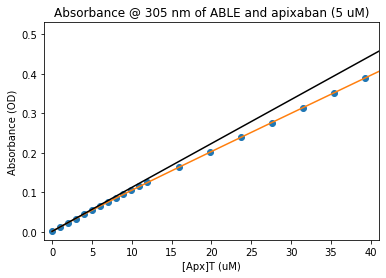

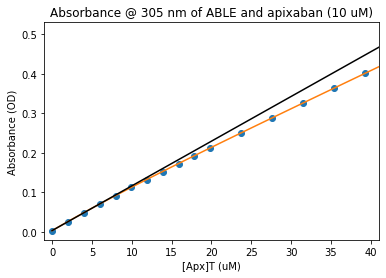

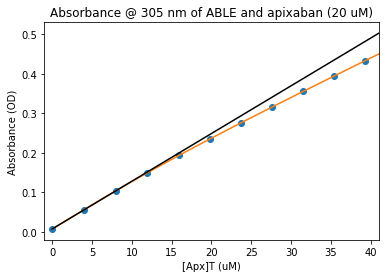

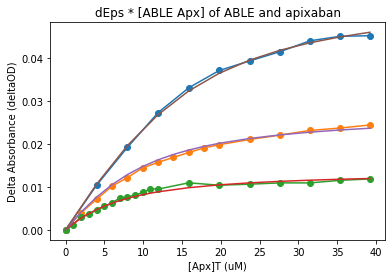

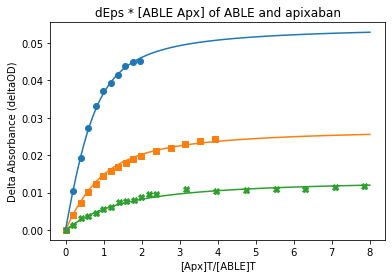